I have trained one Linear Regression Model with different kind of regression like Multi-Linear Regression, Ridge Regerssion, Lasso regression, and ElasticNet Regression. However, while plotting the prediction vlaues, the plots were forming some curve thus let's try polynomial Regression to improve the Model's accuracy. Earlier Accuracy was 87.75%

In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("Diamonds Prices2022.csv", index_col=0)

# making all the features numeric (Done in depth in the linear regression model)
df['cut']= df['cut'].replace(df['cut'].unique(), np.arange(1,len(df['cut'].unique())+1)) 
df['color']= df['color'].replace(df['color'].unique(), np.arange(1,len(df['color'].unique())+1)) 
df['clarity']= df['clarity'].replace(df['clarity'].unique(), np.arange(1,len(df['clarity'].unique())+1))
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,1,1,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,2,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
4,0.29,2,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,3,3,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53939,0.86,2,4,1,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,1,7,1,62.2,55.0,2757,5.83,5.87,3.64
53941,0.71,2,1,2,60.5,55.0,2756,5.79,5.74,3.49
53942,0.71,2,5,2,59.8,62.0,2756,5.74,5.73,3.43


## Polynomial Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [9]:
x=df.drop(columns=['price'])
y=df['price']

In [10]:
# splitting the data
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=45)

In [11]:
# scaling all the data
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [13]:
# making the polynomial regression model
polyModel= PolynomialFeatures(degree=2, include_bias=True)
poly_Xtrain=polyModel.fit_transform(X_train)
poly_Xtest= polyModel.transform(X_test)


In [16]:
regression= LinearRegression()
regression.fit(poly_Xtrain, y_train)

LinearRegression()

In [19]:
# printing the feature coefficient and intercept
print("coeff: ",regression.coef_.tolist())
print("Intercept: ", regression.intercept_)

coeff:  [1.486905772415068e-12, 3682.9544058567417, -80.52018849900415, 353.55421479085453, 629.0097212746599, 4.516485282741371, -69.70530179586686, -2110.977275178686, 3111.468119566401, -761.1709839085147, -892.2828904749022, -148.88636214751398, 411.97513740030763, -863.2938061044431, -102.30238839797255, -101.66048373594231, -2172.3163371682604, 3301.3257429052583, 130.96890628429276, 18.098151436392527, -11.446004190792053, -72.03254658088827, 32.72994861216145, -14.949112091016076, 953.7389606454442, -340.6945398478571, -583.2485285922517, 361.684269050629, 115.4660370229443, -103.63165630144704, -29.399580055753972, 241.72296500538917, -1099.7844737167225, 719.997405828733, -208.8361139726194, -47.0606462859879, -37.93836413877625, -1987.8211812627303, 2828.9249366738495, 265.40015745841583, -2.0635503117322287, -16.490554034563274, 798.290913712489, -538.0594463375658, -240.18627781803377, 1.3127485249621031, -276.59274179440195, -67.7717677307439, 391.74872090524866, 3594.981

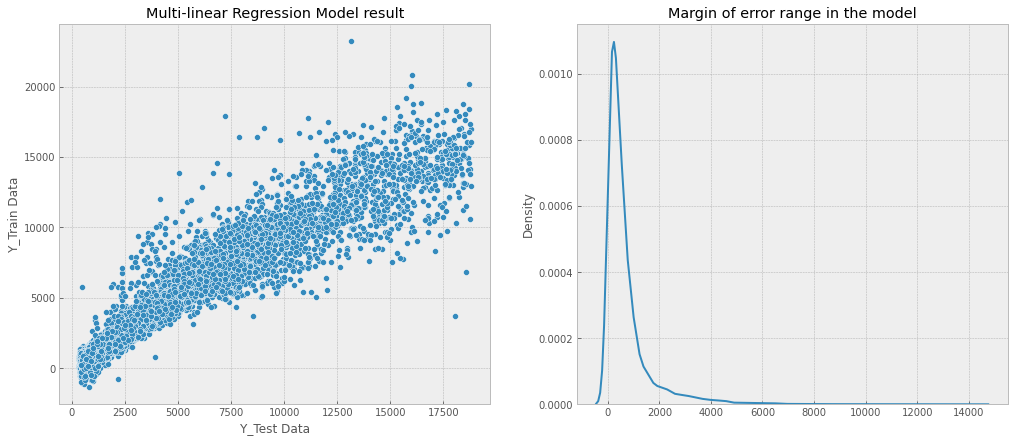

In [32]:
# plotting the linear regression model
plt.style.use('bmh')
y_pred= regression.predict(poly_Xtest)
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Y_Test Data')
plt.ylabel("Y_Train Data")
plt.title("Multi-linear Regression Model result")

plt.subplot(1,2,2)
a= np.array(y_test)
b= np.array(regression.predict(poly_Xtest))
sns.kdeplot(x=abs(a-b))
plt.title("Margin of error range in the model")

plt.show()

We can see that the model error range is less than every multi-regression model, thus we hope that this model is going to have much more accuracy than the previous regression models

* Checking the Model's Accuracy

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)

print("R-squared score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

R-squared score:  0.9118735860571878
Mean Squared Error:  1418372.872265233
Mean Absolute Error:  700.50046888166


#### Here model's accuracy is `91.18%`, which is much more than previous regression models i.e `87.75%`. Also, the mean squared Error is much less in the Polynomial Regression model.